In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/max-pooling/max_pooling.PNG
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4329.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4223.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4253.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4190.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4354.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4136.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4226.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4214.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4888.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4170.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4323.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4262.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4788.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4657.jpg
/kaggle/input/cat-and-dog/test_set/test_set/dogs/dog.4387.jpg
/kaggle/input/cat-and-dog/te

In [2]:
import matplotlib.pyplot as plt

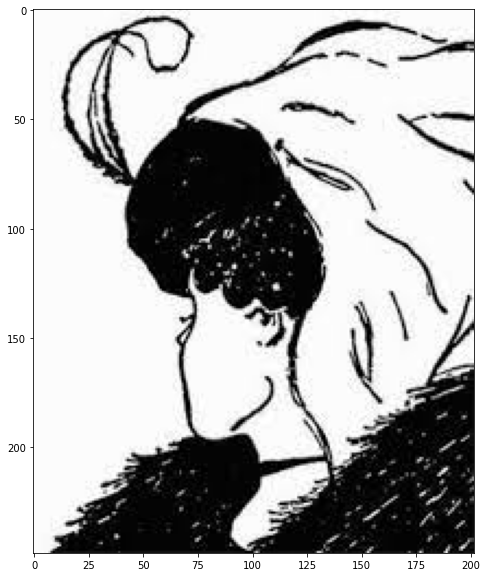

In [3]:
plt.figure(figsize=(15,10))
plt.imshow(plt.imread("../input/complex1/complex1.jfif"))

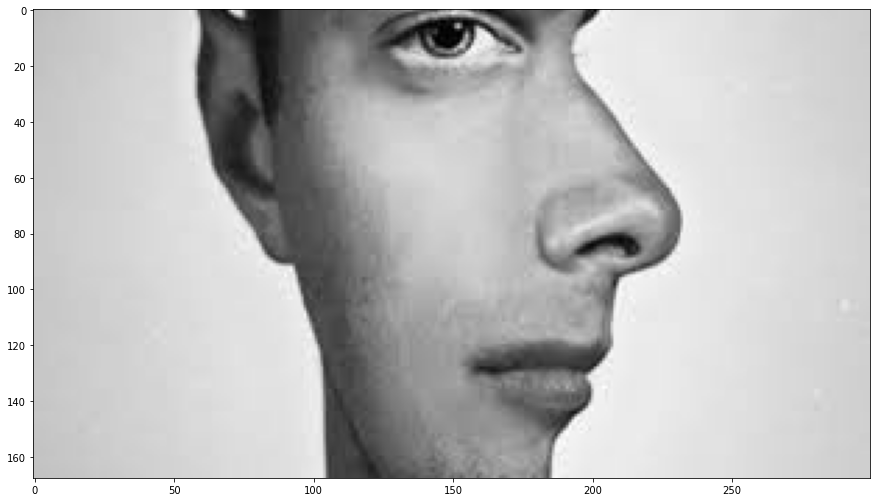

In [4]:
plt.figure(figsize=(15,10))
plt.imshow(plt.imread("../input/complex2/complex2.jfif"))

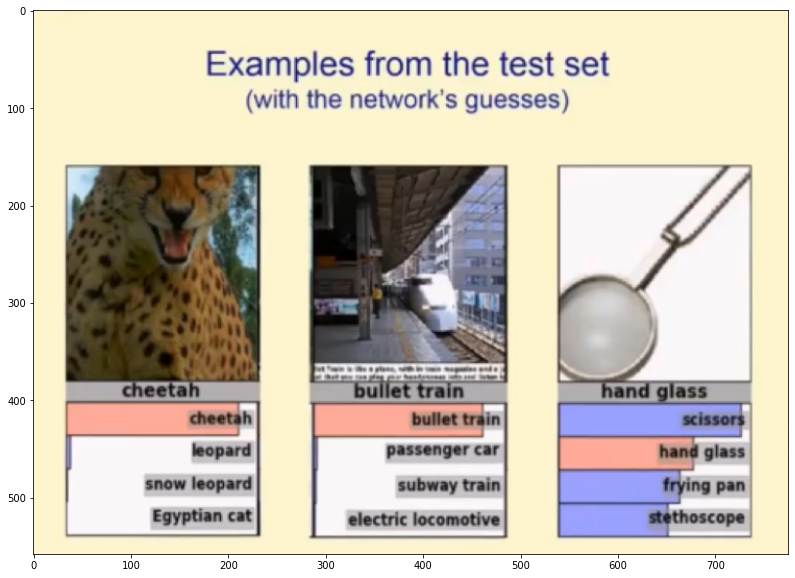

In [5]:
plt.figure(figsize=(15,10))
plt.imshow(plt.imread("../input/computer/computer.PNG"))

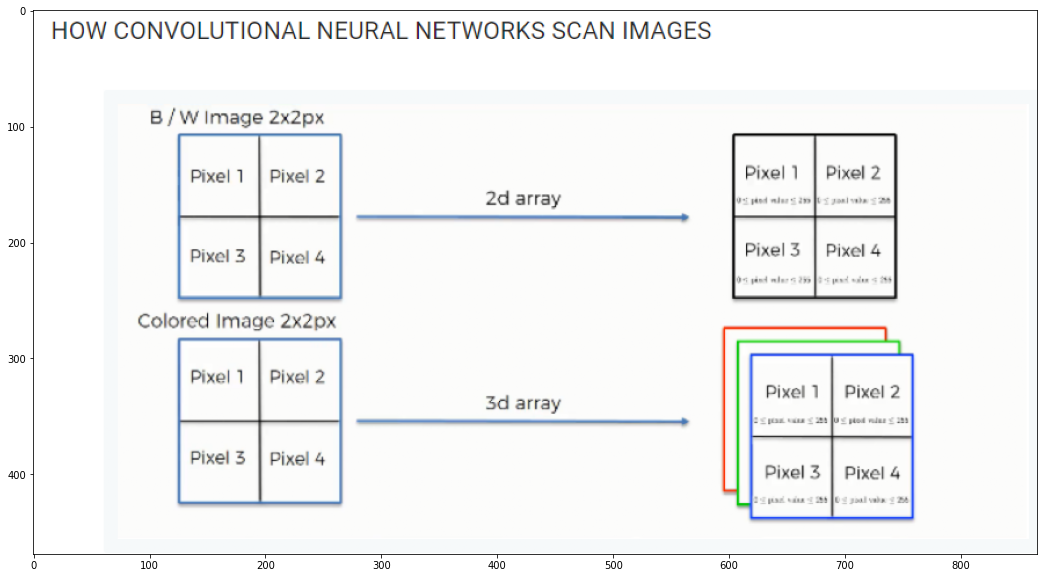

In [6]:
plt.figure(figsize=(20,10))
plt.imshow(plt.imread("../input/picture/picture_comp.PNG"))

PART 1: INTRODUCTION TO NEURAL NETWORKS:

A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. 

Just like your brain oftentimes mistakenly categorizes objects at first sight, convolutional neural networks are prone to the same indecision when presented with an object or an image from an angle that can easily place it under more than one category.

Why Convolutional Neural Networks Are So Important
To understand this, you can ask yourself a couple of simple questions:

How do self-driving cars recognize other cars as well as pedestrians and street objects?
How did Facebook go from making you tag people in images yourself, to being able to identify your friends and automatically tag them as it does now?

And the answer to both questions would be: through the magic of convolutional neural networks.

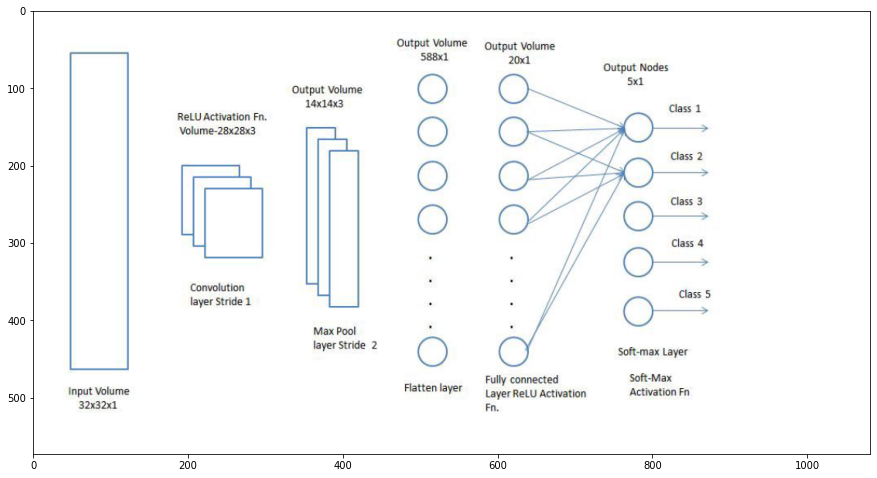

In [7]:
plt.figure(figsize=(15,10))
plt.imshow(plt.imread("../input/general-description/general_view.PNG"))

PART 1: DATA PREPROCESSING

In [8]:
import tensorflow as tf

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#Generate batches of tensor image data with real-time data augmentation.

In [10]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
training_set = train_datagen.flow_from_directory(
        '../input/cat-and-dog/training_set/training_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 8005 images belonging to 2 classes.


In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory(
        '../input/cat-and-dog/test_set/test_set',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

Found 2023 images belonging to 2 classes.


PART 2:BUILDING CNN:

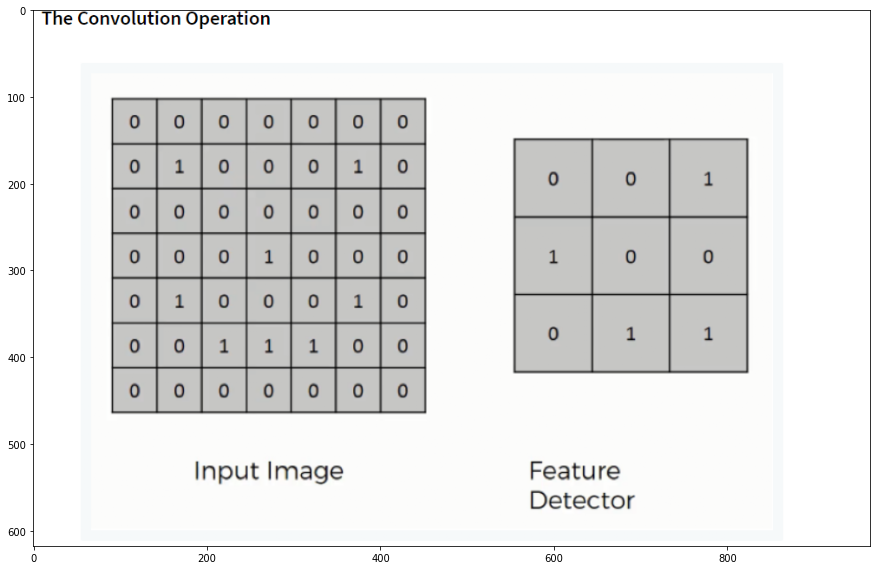

In [12]:
plt.figure(figsize=(15,10))
plt.imshow(plt.imread("../input/feature/feature.PNG"))

In [13]:
from tensorflow.keras.models import Sequential

In [14]:
cnn= Sequential()

In [15]:
from tensorflow.keras.layers import Conv2D

1.Step: Creating CNN

In [16]:
cnn.add(Conv2D(filters=32, kernel_size=3, activation="relu",input_shape=[64,64,3]))

2.Step: Pooling:

Similar to the Convolutional Layer, the Pooling layer is responsible for reducing the spatial size of the Convolved Feature. his is to decrease the computational power required to process the data through dimensionality reduction. Furthermore, it is useful for extracting dominant features 

In [17]:
from tensorflow.keras.layers import MaxPool2D

Max Pooling returns the maximum value from the portion of the image covered by the Kernel. 

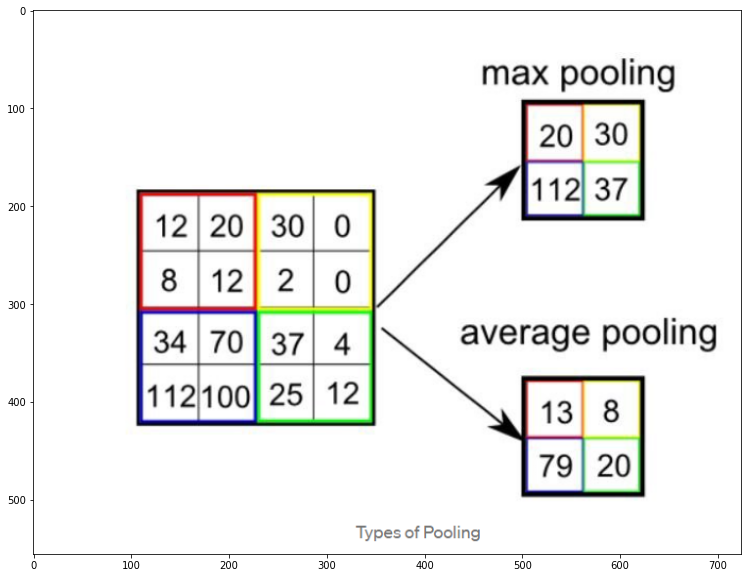

In [18]:
plt.figure(figsize=(15,10))
plt.imshow(plt.imread("../input/max-pooling/max_pooling.PNG"))

In [19]:
cnn.add(MaxPool2D(pool_size=2, strides=2))

3.Step: Adding Second Convolutional Layer:

In [20]:
cnn.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
from tensorflow.keras.layers import MaxPool2D

4.Step: Flattening: Transformin all these Copnvolutional Layers into 1D vector in order to use ANNs

In [21]:
from tensorflow.keras.layers import Flatten

In [22]:
cnn.add(Flatten())

5. Step: Full Connection

Over a series of epochs, the model is able to distinguish between dominating and certain low-level features in images and classify them using the Softmax Classification technique.

In [23]:
from tensorflow.keras.layers import Dense

In [24]:
cnn.add(Dense(units=128, activation="relu"))

In [25]:
cnn.add(Dense(units=64, activation="relu"))

In [26]:
cnn.add(Dense(units=1, activation="sigmoid"))

Compiling the CNN:

In [27]:
cnn.compile(optimizer="adam", loss="binary_crossentropy",metrics=["accuracy"])

In [28]:
cnn.fit(x=training_set,validation_data=test_set,epochs=15)

Epoch 1/15
251/251 [==============================] - 89s 353ms/step - loss: 0.7259 - accuracy: 0.5331 - val_loss: 0.7044 - val_accuracy: 0.5368
Epoch 2/15
251/251 [==============================] - 58s 231ms/step - loss: 0.6495 - accuracy: 0.6328 - val_loss: 0.6184 - val_accuracy: 0.6688
Epoch 3/15
251/251 [==============================] - 59s 234ms/step - loss: 0.6211 - accuracy: 0.6545 - val_loss: 0.5748 - val_accuracy: 0.7108
Epoch 4/15
251/251 [==============================] - 58s 232ms/step - loss: 0.5767 - accuracy: 0.6932 - val_loss: 0.5448 - val_accuracy: 0.7261
Epoch 5/15
251/251 [==============================] - 58s 231ms/step - loss: 0.5480 - accuracy: 0.7263 - val_loss: 0.5764 - val_accuracy: 0.6906
Epoch 6/15
251/251 [==============================] - 58s 229ms/step - loss: 0.5281 - accuracy: 0.7315 - val_loss: 0.5202 - val_accuracy: 0.7439
Epoch 7/15
251/251 [==============================] - 58s 230ms/step - loss: 0.5051 - accuracy: 0.7487 - val_loss: 0.5124 - val_ac

PART 3: MAKING PREDICTIONS:

In [29]:
from tensorflow.keras.preprocessing import image

image.load_img() loads image into pil format

In [30]:
def predictor(location):
    test_image=image.load_img(location,target_size=(64,64))
    test_image=image.img_to_array(test_image)
    test_image=np.expand_dims(test_image, axis=0)
    result=cnn.predict(test_image)
    training_set.class_indices
    if result[0][0] == 1:
        
        prediction = "It is a dog"
    else:
        prediction = "It is a cat"
    print(result[0][0])
    return prediction

In [31]:
location= "../input/single-cat/cat_or_dog_2.jpg"
predictor(location)

0.0


'It is a cat'

In [32]:
location= "../input/singledog/cat_or_dog_1.jpg"
predictor(location)

1.0


'It is a dog'

In [33]:
location= "../input/single-cat2/cat.jpg"
predictor(location)

1.2199317e-16


'It is a cat'

In [34]:
location= "../input/single-dog2/dog.jpg"
predictor(location)

1.0


'It is a dog'